<a href="https://colab.research.google.com/github/ochekroun/projet-ia/blob/master/detection-visages/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip install face_recognition

In [ ]:
import requests
import tarfile
import os

# Fonction pour télécharger un fichier
def download_file(url, local_filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                if chunk:  # filter out keep-alive new chunks
                    f.write(chunk)
    return local_filename

# Fonction pour décompresser un fichier tar.gz
def extract_tar_gz(tar_gz_path, extract_path):
    with tarfile.open(tar_gz_path, 'r:gz') as tar:
        tar.extractall(path=extract_path)

# URL du fichier tar.gz à télécharger
url = 'https://olivierchekroun.blob.core.windows.net/documents/projet-ia/images.tar.gz'

# Chemin local pour enregistrer le fichier téléchargé
local_filename = 'file.tar.gz'

# Chemin où décompresser le fichier
extract_path = 'images'

# Créer le dossier de décompression s'il n'existe pas
os.makedirs(extract_path, exist_ok=True)

# Télécharger le fichier
download_file(url, local_filename)

# Décompresser le fichier
extract_tar_gz(local_filename, extract_path)

print(f"Fichier téléchargé et décompressé dans {extract_path}")

### Encondings des visage à détecter

./images/faces/olivier.jpg


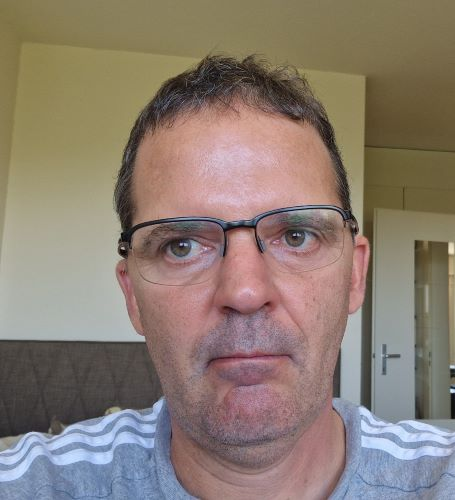

./images/faces/lovls.jpg


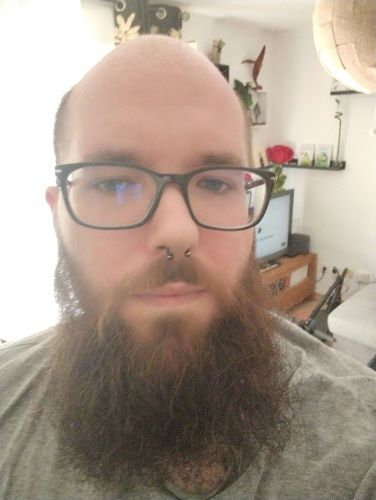

['olivier', 'lovls']


In [4]:
import os
from PIL import Image, ImageDraw
from IPython.display import display
import face_recognition
import numpy as np

directory_path = './images/faces'
# List all files and directories
known_face_encodings = []
known_face_names = []
for entry in os.listdir(directory_path):
    full_path = os.path.join(directory_path, entry)
    print(full_path)
    # The program we will be finding faces on the example below
    pil_im = Image.open(full_path)
    display(pil_im)    
    current_image = face_recognition.load_image_file(full_path)
    current_encodings = face_recognition.face_encodings(current_image)
    if(len(current_encodings)):
        face_encoding = current_encodings[0]
        known_face_encodings.append(face_encoding)
        file_name_without_extension = os.path.splitext(os.path.basename(full_path))[0]
        known_face_names.append(file_name_without_extension)


print(known_face_names)        

### Détection des visages et identifications

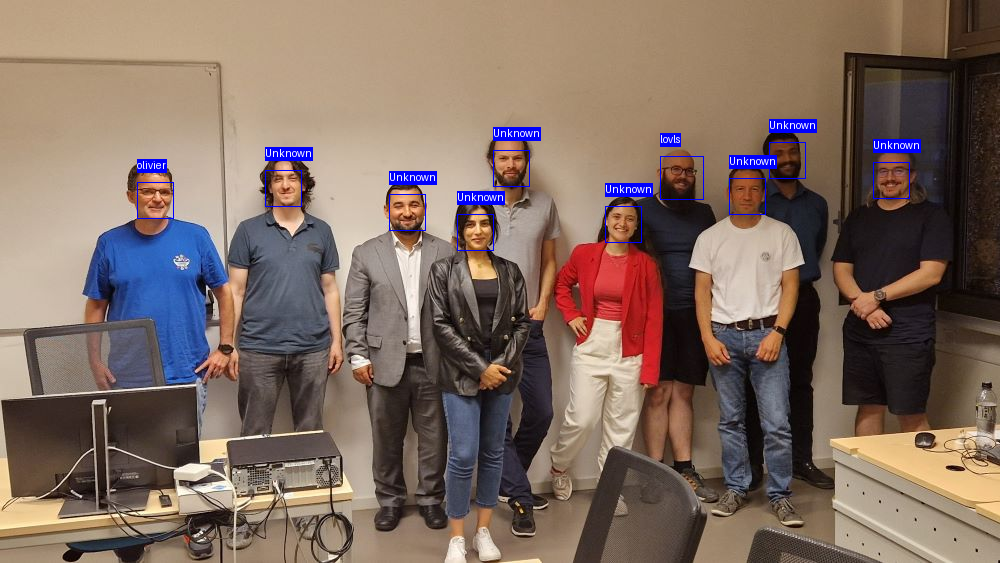

In [5]:
# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("images/formationia-membres.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
# See http://pillow.readthedocs.io/ for more about PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Create a Pillow ImageDraw Draw instance to draw with
draw = ImageDraw.Draw(pil_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Or instead, use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Draw a label with a name below the face
    (left, top, right, bottom) = draw.textbbox(text=name,xy=(left,top)) 
    textwidth, textheight = (right - left, bottom - top)

    draw.rectangle(((left, bottom - textheight - 25), (right, bottom - 20)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left, bottom - textheight - 25), name, fill=(255, 255, 255, 255))


# Remove the drawing library from memory as per the Pillow docs
del draw

# Display the resulting image
display(pil_image)